In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate()

 Activating environment at `/tmpdir/notebook/Project.toml`


# Chapter 4 - 回帰分析
## 4.1 線形回帰分析

In [2]:
include("../src/data.jl")
include("../src/linear_regression.jl")

using Plots

In [3]:
# 1. データの作成
data = regression_data1()

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = regression_data1() at data.jl:16
└ @ Main.##266 /tmpdir/src/data.jl:16
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = regression_data1() at data.jl:17
└ @ Main.##266 /tmpdir/src/data.jl:17


Main.##266.RegressionData([1710; 1786; … ; 2090; 1647], [208500, 223500, 250000, 200000, 345000, 325300, 309000, 177000, 196500, 438780  …  230000, 340000, 179900, 271000, 192140, 186500, 197000, 310000, 240000, 175000], "居住面積x[平方フィート]", "物件価格y[ドル]")

In [4]:
# 2. データを学習用と評価ように分割
n_train = floor(Int64, length(data.X) * 0.9)
# 学習データ(全体の90%)
x_train = data.X[begin:n_train, :]
y_train = data.Y[begin:n_train]

# 評価データ(全体の10%)
x_test = data.X[n_train + 1:end, :]
y_test = data.Y[n_train + 1:end]

30-element Array{Int64,1}:
 290000
 302000
 333168
 206900
 190000
 176500
 200000
 228500
 155835
 171000
      ⋮
 340000
 179900
 271000
 192140
 186500
 197000
 310000
 240000
 175000

In [5]:
# 4. 線形モデルの学習
model = LinearRegression(x_train, y_train)
train!(model)

Main.##266.LinearRegression([1710; 1786; … ; 5642; 1983], [208500, 223500, 250000, 200000, 345000, 325300, 309000, 177000, 196500, 438780  …  186500, 294000, 165400, 181000, 162000, 237000, 281000, 162900, 160000, 225000], 269, 1, [118.33107052341121], 2137.450403389295)

In [6]:
println("モデルパラメーター:\nw=$(model.w), \nb=$(model.b)")
println("平方平均二乗誤差=$(rmse(model, x_test, y_test))ドル")
println("決定係数=$(r2(model, x_test, y_test))")

モデルパラメーター:
w=[118.33107052341121], 
b=2137.450403389295
平方平均二乗誤差=30813.160078722958ドル
決定係数=0.636344531102756


In [7]:
scatter(model.X, model.Y, label = "Data",
        xlabel = "Garage Area x (square feet)",
        ylabel = "Sale Price y (USD)")
xs = 0:100:6000

0:100:6000

予測を計算する。xs は reshapeする必要あり

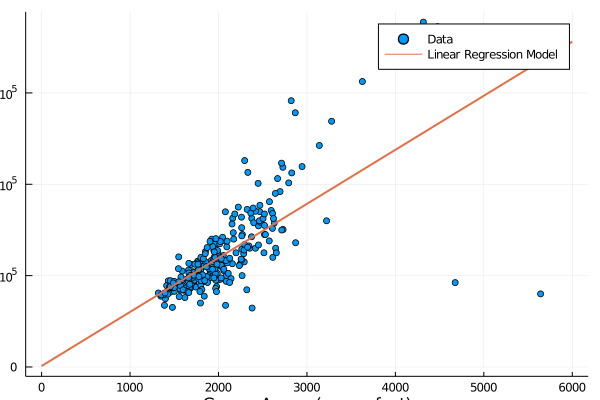

In [8]:
ys = predict(model, reshape(xs, :, 1))
plot!(xs, ys, linewidth = 2, label = "Linear Regression Model")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*